In [222]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [223]:
applicants = pd.read_csv("loan.csv")

/Users/krishs87/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.



In [224]:
original = applicants.copy()

In [226]:
applicants.info(verbose=False, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [207]:
applicants.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


DataCleaning :
- Removing Null Valued columns
- Removing Unecessary columns
- Removing % from int_rate

In [227]:
applicants.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [228]:
applicants.shape

(39717, 111)

In [229]:
applicants.dropna(axis = 1, how ='all', inplace = True) 

In [230]:
applicants.shape

(39717, 57)

In [231]:
applicants.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [233]:
# removing this column as it is having more than 90% null values
applicants.drop(['next_pymnt_d'], axis = 1,inplace=True) 

In [234]:
applicants.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [235]:
applicants.drop(['mths_since_last_record'], axis = 1,inplace=True) 

In [217]:
applicants.drop(['mths_since_last_delinq'], axis = 1,inplace=True) 

In [236]:
applicants.drop(['application_type'],axis=1,inplace=True)

In [237]:
applicants.drop(['desc'], axis = 1,inplace=True) 

In [238]:
applicants.drop(['url'], axis = 1,inplace=True)

In [239]:
applicants.drop(['zip_code'], axis = 1,inplace=True)

In [240]:
applicants.drop(['emp_title'], axis = 1,inplace=True)

In [241]:
applicants.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1, inplace=True) 

- columns ID and MemberID doesnt gives info on defaulter so removing

In [242]:
applicants.drop(['id','member_id'], axis=1, inplace=True) 

In [243]:
applicants.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

- payment plans (n), policy code (1) ,initial_list_status (f) ,desc not giving much information , so removing

In [253]:
applicants['pymnt_plan'].value_counts()
applicants['policy_code'].value_counts()
applicants['initial_list_status'].value_counts()
applicants.drop(['pymnt_plan','policy_code', 'initial_list_status'], axis=1, inplace=True)

In [255]:
applicants.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

- distribution of loan status using pie chart
- majority of loans are good loans

In [272]:
applicants.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [256]:
round(100*applicants[applicants['loan_status'] == 'Charged Off'].shape[0])/applicants.shape[0]
round(100*applicants[applicants['loan_status'] == 'Fully Paid'].shape[0])/applicants.shape[0]
round(100*applicants[applicants['loan_status'] == 'Current'].shape[0])/applicants.shape[0]

2.8703074250321023

In [257]:
fig = px.pie(applicants, values=[14.16,82.96,2.87], names=['Charged off','Fully Paid','Current'])
fig.show()

- Grades are given by Lenderclub based on applicants profile , so higher the grade riskier the applicant and more interest rate
. its distribution ( across loan status )


In [258]:
applicants['grade'].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [265]:
round(100*applicants[applicants['grade'] == 'A'].shape[0])/applicants.shape[0]
round(100*applicants[applicants['grade'] == 'B'].shape[0])/applicants.shape[0]
round(100*applicants[applicants['grade'] == 'C'].shape[0])/applicants.shape[0]
round(100*applicants[applicants['grade'] == 'D'].shape[0])/applicants.shape[0]
round(100*applicants[applicants['grade'] == 'E'].shape[0])/applicants.shape[0]
round(100*applicants[applicants['grade'] == 'F'].shape[0])/applicants.shape[0]
round(100*applicants[applicants['grade'] == 'G'].shape[0])/applicants.shape[0]

0.7956290757106529

In [266]:
fig = px.pie(applicants, values=[25.39,30.26,20.38,13.36,7.15,2.64,0.79], names=['A','B','C','D','E','F','G'])
fig.show()

- removing sub grades , as it may lead to complex analysis

In [268]:
applicants['sub_grade'].value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [269]:
applicants.drop(['sub_grade'], axis = 1,inplace=True) 

In [271]:
applicants.shape

(39717, 41)

In [25]:
applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

- creating a seperate dataframes for good loans and bad loans

In [275]:
df_fullpaid = applicants[applicants['loan_status'].isin(['Fully Paid'])]
df_chargOff = applicants[applicants['loan_status'].isin(['Charged Off'])]

In [276]:
df = pd.concat([df_fullpaid, df_chargOff])

In [277]:
df = df.reset_index(drop=True)

In [279]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [281]:
df['loan_binary'] = df['loan_status'].apply(lambda x: 0 if x == "Fully Paid" else 1)

In [283]:
df['loan_binary'].value_counts()

0    32950
1     5627
Name: loan_binary, dtype: int64

In [285]:
loan_status = pd.crosstab(df.grade, df.loan_binary)

In [292]:
pd.crosstab(df.grade, df.loan_binary)

loan_binary,0,1
grade,,
A,9443,602
B,10250,1425
C,6487,1347
D,3967,1118
E,1948,715
F,657,319
G,198,101


In [295]:
loan_status = loan_status.div(loan_status.sum(1).astype(float),axis=0)
loan_status

loan_binary,0,1
grade,,
A,0.940070,0.059930
B,0.877944,0.122056
C,0.828057,0.171943
D,0.780138,0.219862
E,0.731506,0.268494
F,0.673156,0.326844
G,0.662207,0.337793


Text(0, 0.5, 'Loan Status')

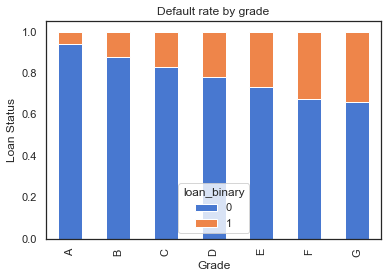

In [294]:
#Stacked histogram
loan_status.plot(kind='bar', stacked=True, title='Default rate by grade')
plt.xlabel('Grade')
plt.ylabel('Loan Status')

- from above we can see higher interests are added to risky applicants and increases the bad loans

- converting int_rate to numeric , by removing % symbol

In [ ]:
#Strip "%"
df.int_rate = df.int_rate.str.replace("%","") 

#Convert to int64
df[['int_rate']] = df[['int_rate']].apply(pd.to_numeric)

- checking how terms affect loan status

In [304]:
pd.crosstab(df.term, df.loan_binary)

loan_binary,0,1
term,,
36 months,25869,3227
60 months,7081,2400


Text(0, 0.5, 'Loan Status')

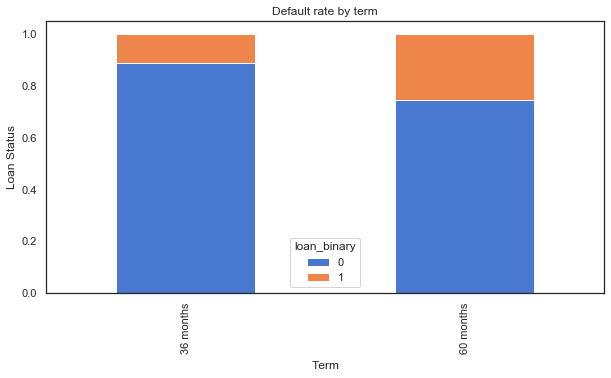

In [305]:
#pd.crosstab(df.term, df.loan_binary)
term_status = pd.crosstab(df.term, df.loan_binary)
term_status = term_status.div(term_status.sum(1).astype(float), axis=0)


term_status.plot(kind='bar', stacked=True, title='Default rate by term', figsize=(10,5))
plt.xlabel('Term')
plt.ylabel('Loan Status')

- from above it seems , bad loans increases with tenure

- checking how the loans affect from home ownership

Text(0, 0.5, 'Loan Status')

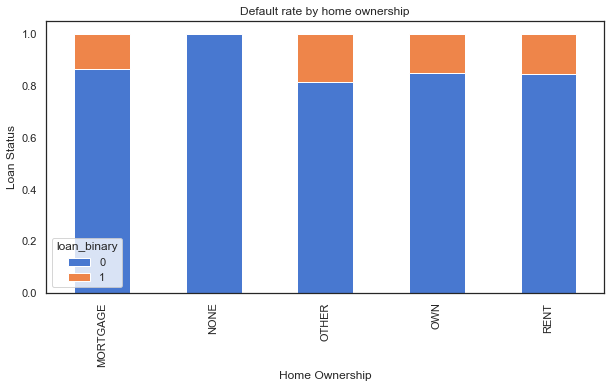

In [306]:

home_ownship = pd.crosstab(df.home_ownership, df.loan_binary)
home_ownship = home_ownship.div(home_ownship.sum(1).astype(float), axis=0)


home_ownship.plot(kind='bar', stacked=True, title='Default rate by home ownership', figsize=(10,5))
plt.xlabel('Home Ownership')
plt.ylabel('Loan Status')

- from above seems houseowner ship is not having much affect on bad loans

- checking if purpose of taking loan leads to bad loan

Text(0, 0.5, 'Loan Status')

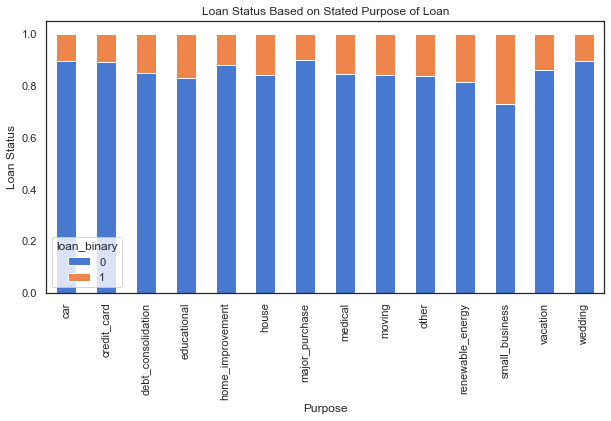

In [307]:
purpose = pd.crosstab(df.purpose , df.loan_binary)
purpose = purpose.div(purpose.sum(1).astype(float), axis=0)


purpose.plot(kind='bar', stacked=True, title='Loan Status Based on Stated Purpose of Loan', figsize=(10,5))
plt.xlabel('Purpose')
plt.ylabel('Loan Status')

- from above we can say , small buisness and educational purpose more tendency towards bad loan

- to check if any region has more tendecy towards bad loan

Text(0, 0.5, 'Loan Status')

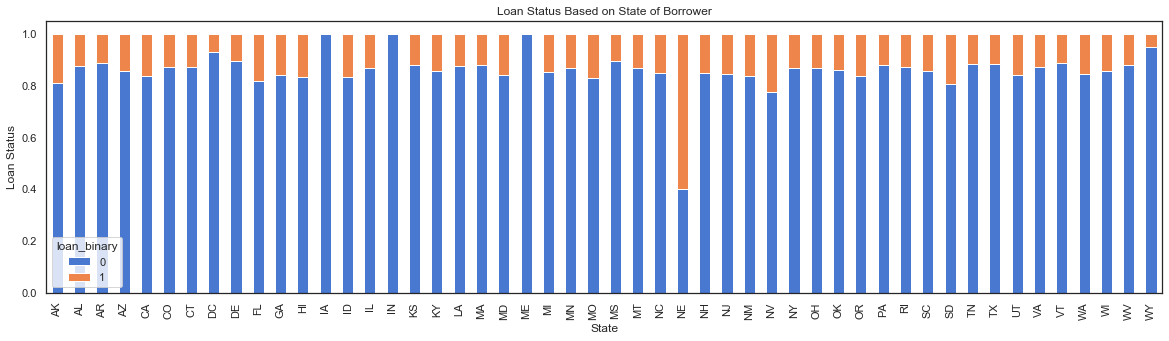

In [308]:
state = pd.crosstab(df.addr_state , df.loan_binary)
state = state.div(state.sum(1).astype(float), axis=0)


state.plot(kind='bar', stacked=True, title='Loan Status Based on State of Borrower', figsize=(20,5))
plt.xlabel('State')
plt.ylabel('Loan Status')

- from above NE is having more tendecy towards bad loan

In [309]:
df['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

Text(0, 0.5, 'Loan Status')

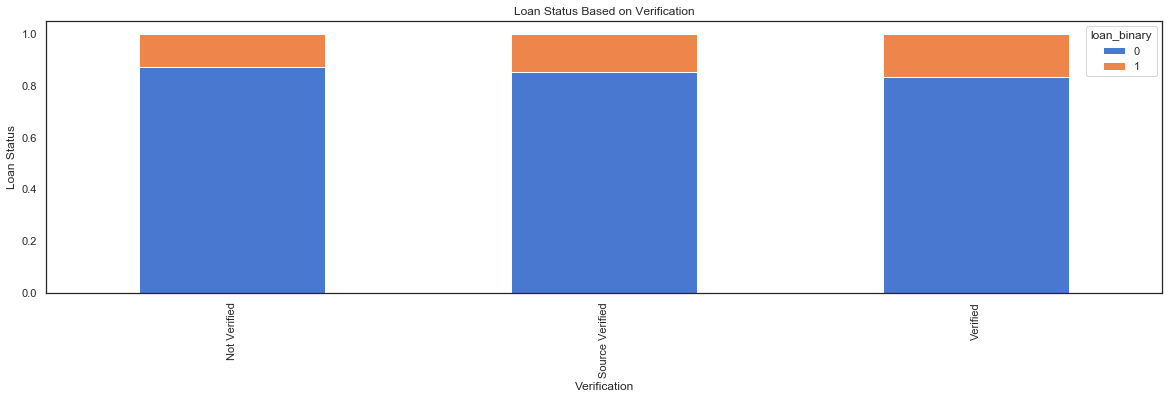

In [310]:
state = pd.crosstab(df.verification_status , df.loan_binary)
state = state.div(state.sum(1).astype(float), axis=0)


state.plot(kind='bar', stacked=True, title='Loan Status Based on Verification', figsize=(20,5))
plt.xlabel('Verification')
plt.ylabel('Loan Status')

- from above we see there is not much impact on verification status

In [311]:
df['delinq_2yrs'].value_counts()

0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

Text(0, 0.5, 'Loan Status')

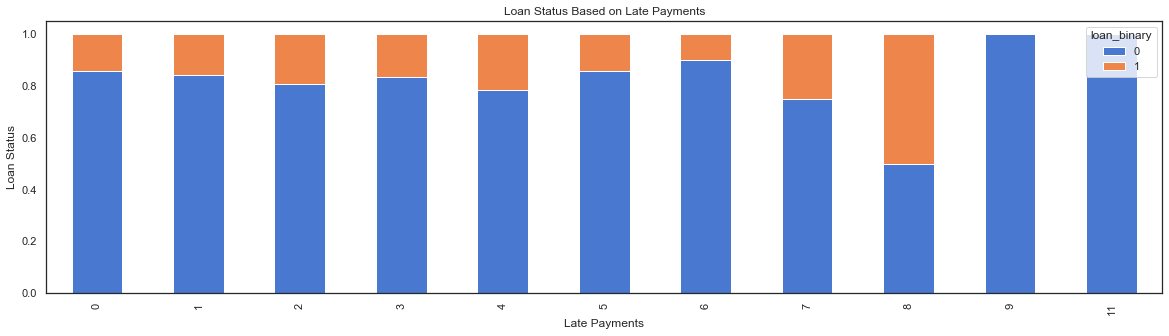

In [312]:
state = pd.crosstab(df.delinq_2yrs , df.loan_binary)
state = state.div(state.sum(1).astype(float), axis=0)


state.plot(kind='bar', stacked=True, title='Loan Status Based on Late Payments', figsize=(20,5))
plt.xlabel('Late Payments')
plt.ylabel('Loan Status')

- from above we see there is no constant trend of charged off getting increased due to high late payments , so we are neglecting this variable

In [313]:
df['open_acc'].value_counts()

7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
33       3
32       3
36       2
38       1
39       1
41       1
42       1
44       1
Name: open_acc, dtype: int64

Text(0, 0.5, 'Loan Status')

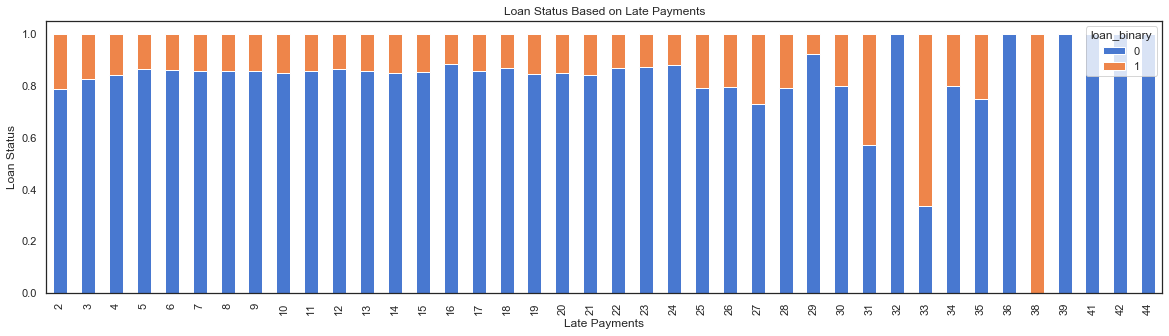

In [314]:
state = pd.crosstab(df.open_acc , df.loan_binary)
state = state.div(state.sum(1).astype(float), axis=0)


state.plot(kind='bar', stacked=True, title='Loan Status Based on Late Payments', figsize=(20,5))
plt.xlabel('Late Payments')
plt.ylabel('Loan Status')

- from above we dont see there is increase in trend of being charged off due to deliq_2yrs data

In [315]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

Text(0, 0.5, 'Loan Status')

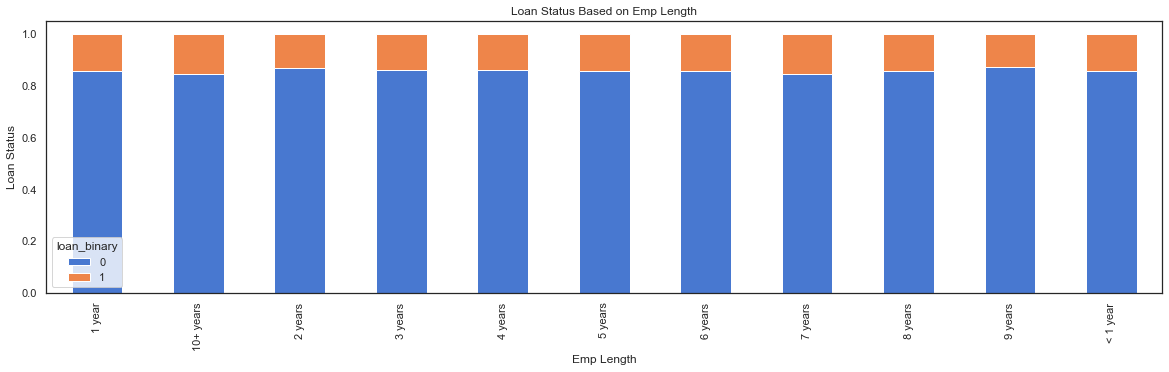

In [316]:
state = pd.crosstab(df.emp_length , df.loan_binary)
state = state.div(state.sum(1).astype(float), axis=0)


state.plot(kind='bar', stacked=True, title='Loan Status Based on Emp Length', figsize=(20,5))
plt.xlabel('Emp Length')
plt.ylabel('Loan Status')

- from above we see employee length has not impact on loan status

In [320]:
bins = []
labels = []
i = 0

for x in range(0, 10):
    lowerValue = df['annual_inc'].quantile(x/10)
    print(lowerValue)
    upperValue = df['annual_inc'].quantile((x+1)/10)
    print(upperValue)
    bins.append(lowerValue)    
    labels.append("".join((str(lowerValue)," - ",str(upperValue))))
    

bins.append(upperValue)

df['annual_inc_dist']=pd.cut(x=df['annual_inc'], bins=bins, labels=labels, duplicates='drop')

print(df.groupby(['annual_inc_dist','loan_status'])['loan_status'].count())

4000.0
30000.0
30000.0
37196.16
37196.16
44500.0
44500.0
50004.0
50004.0
58868.0
58868.0
65004.0
65004.0
75000.0
75000.0
90000.0
90000.0
115000.0
115000.0
6000000.0
annual_inc_dist       loan_status
4000.0 - 30000.0      Charged Off     839
                      Fully Paid     3711
30000.0 - 37196.16    Charged Off     574
                      Fully Paid     2591
37196.16 - 44500.0    Charged Off     627
                      Fully Paid     3232
44500.0 - 50004.0     Charged Off     592
                      Fully Paid     3317
50004.0 - 58868.0     Charged Off     561
                      Fully Paid     3244
58868.0 - 65004.0     Charged Off     588
                      Fully Paid     3286
65004.0 - 75000.0     Charged Off     518
                      Fully Paid     3376
75000.0 - 90000.0     Charged Off     510
                      Fully Paid     3525
90000.0 - 115000.0    Charged Off     389
                      Fully Paid     3242
115000.0 - 6000000.0  Charged Off     429
   

In [322]:
#df['annual_inc_dist'].value_counts()
pd.crosstab(df.annual_inc_dist , df.loan_binary)

loan_binary,0,1
annual_inc_dist,,
4000.0 - 30000.0,3711,839
30000.0 - 37196.16,2591,574
37196.16 - 44500.0,3232,627
44500.0 - 50004.0,3317,592
50004.0 - 58868.0,3244,561
58868.0 - 65004.0,3286,588
65004.0 - 75000.0,3376,518
75000.0 - 90000.0,3525,510
90000.0 - 115000.0,3242,389


Text(0, 0.5, 'Loan Status')

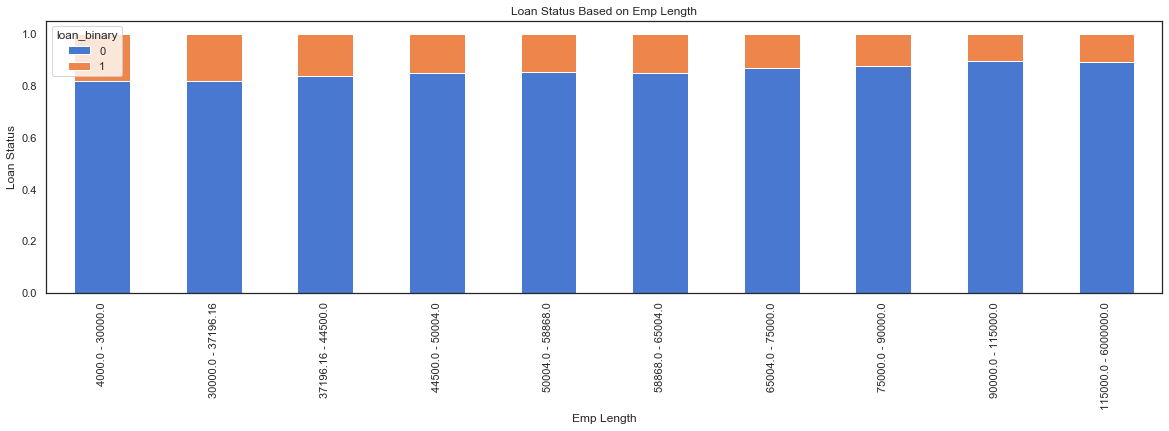

In [325]:
state = pd.crosstab(df.annual_inc_dist , df.loan_binary)
state = state.div(state.sum(1).astype(float), axis=0)
#state.div(state.sum(1).astype(float), axis=0)

state.plot(kind='bar', stacked=True, title='Loan Status Based on Emp Length', figsize=(20,5))
plt.xlabel('Emp Length')
plt.ylabel('Loan Status')

In [334]:

heat_map = df.pivot("loan_amnt","annual_inc_dist","loan_binary")
ax = sns.heatmap(heat_map)

ValueError: Index contains duplicate entries, cannot reshape

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   loan_amnt                38577 non-null  int64   
 1   funded_amnt              38577 non-null  int64   
 2   funded_amnt_inv          38577 non-null  float64 
 3   term                     38577 non-null  object  
 4   int_rate                 38577 non-null  float64 
 5   installment              38577 non-null  float64 
 6   grade                    38577 non-null  object  
 7   emp_length               37544 non-null  object  
 8   home_ownership           38577 non-null  object  
 9   annual_inc               38577 non-null  float64 
 10  verification_status      38577 non-null  object  
 11  issue_d                  38577 non-null  object  
 12  loan_status              38577 non-null  object  
 13  purpose                  38577 non-null  object  
 14  title 

In [333]:
df['annual_inc_dist '] = df['annual_inc_dist'].astype('str')

- from above we see lower income range is having more tendency to get charged off

# General Observations :
- Checking which loan amount,which year ,which month had more amount released :
- amount which was given more (10K)
- month in which loans taken more (December)
- year in which loans are taken more (2011)

In [28]:
loan_amount = applicants['loan_amnt'].values

In [29]:
funded_amount = applicants['funded_amnt'].values

In [30]:
investor_funds = applicants['funded_amnt_inv']

Text(0.5, 1.0, 'Total committed by Investors')

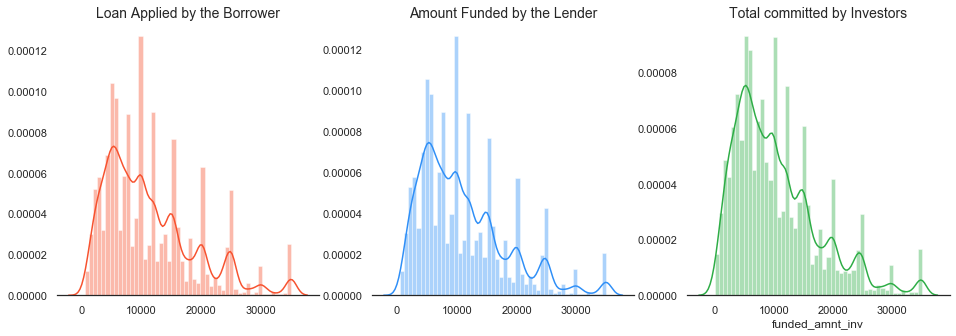

In [31]:
sns.set(style="white", palette="muted", color_codes=True)


# Set up the matplotlib figure
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.despine(left=True)
sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [32]:
applicants['issue_d'] = applicants['issue_d'].astype('str')

In [33]:
applicants_dummy = applicants['issue_d'].str.split("-",expand=True)

In [34]:
applicants['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [35]:
applicants['issue_month'] = applicants_dummy[0]
applicants['issue_year'] = applicants_dummy[1]

In [36]:
applicants['issue_month'].values

array(['Dec', 'Dec', 'Dec', ..., 'Jul', 'Jul', 'Jun'], dtype=object)

In [37]:
applicants['issue_year'].values

array(['11', '11', '11', ..., '07', '07', '07'], dtype=object)

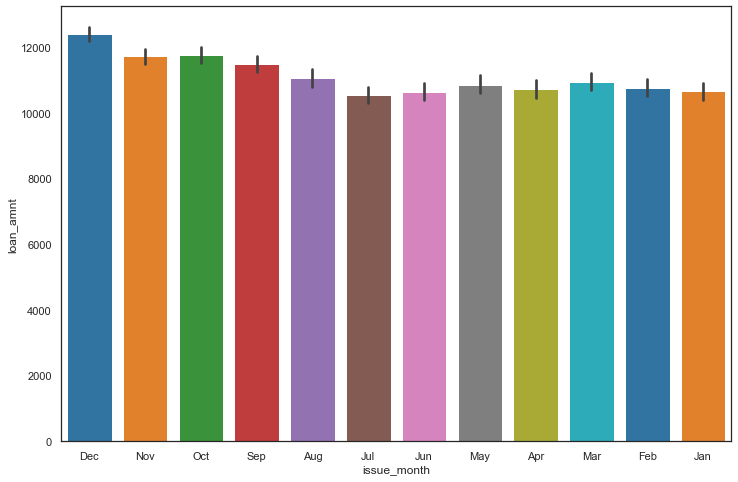

In [38]:
plt.figure(figsize=(12,8))
sns.barplot('issue_month', 'loan_amnt', data=applicants, palette='tab10')

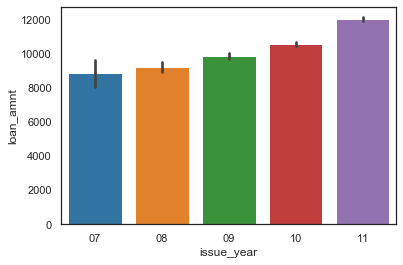

In [39]:
sns.barplot('issue_year', 'loan_amnt', data=applicants, palette='tab10')